<a href="https://colab.research.google.com/github/amoghgopadi/dog-vs-cat/blob/main/TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Model

In [1]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [2]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

# Prepare Dataset

In [3]:
! pip install -q kaggle

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amoghsgopadi","key":"caed95f94f5a083a272393d95e35a1ef"}'}

In [4]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle competitions download -c 'dogs-vs-cats' -p 'Dogs-vs-Cats'

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 26.9MB/s]
100% 541M/543M [00:04<00:00, 140MB/s]
100% 543M/543M [00:04<00:00, 131MB/s]
100% 270M/271M [00:03<00:00, 47.4MB/s]
100% 271M/271M [00:03<00:00, 71.5MB/s]


In [6]:
! unzip 'Dogs-vs-Cats/train.zip' -d 'Dogs-vs-Cats'
! unzip 'Dogs-vs-Cats/test1.zip' -d 'Dogs-vs-Cats'

Streaming output truncated to the last 5000 lines.
  inflating: Dogs-vs-Cats/test1/5499.jpg  
  inflating: Dogs-vs-Cats/test1/55.jpg  
  inflating: Dogs-vs-Cats/test1/550.jpg  
  inflating: Dogs-vs-Cats/test1/5500.jpg  
  inflating: Dogs-vs-Cats/test1/5501.jpg  
  inflating: Dogs-vs-Cats/test1/5502.jpg  
  inflating: Dogs-vs-Cats/test1/5503.jpg  
  inflating: Dogs-vs-Cats/test1/5504.jpg  
  inflating: Dogs-vs-Cats/test1/5505.jpg  
  inflating: Dogs-vs-Cats/test1/5506.jpg  
  inflating: Dogs-vs-Cats/test1/5507.jpg  
  inflating: Dogs-vs-Cats/test1/5508.jpg  
  inflating: Dogs-vs-Cats/test1/5509.jpg  
  inflating: Dogs-vs-Cats/test1/551.jpg  
  inflating: Dogs-vs-Cats/test1/5510.jpg  
  inflating: Dogs-vs-Cats/test1/5511.jpg  
  inflating: Dogs-vs-Cats/test1/5512.jpg  
  inflating: Dogs-vs-Cats/test1/5513.jpg  
  inflating: Dogs-vs-Cats/test1/5514.jpg  
  inflating: Dogs-vs-Cats/test1/5515.jpg  
  inflating: Dogs-vs-Cats/test1/5516.jpg  
  inflating: Dogs-vs-Cats/test1/5517.jpg  
  infla

In [7]:
import os, shutil

original_dataset_dir = 'Dogs-vs-Cats/train'
base_dir = 'data'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir) 
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir) 

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir) 
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir) 

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst) 

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst) 

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [8]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


# **Technique 1** - Extract features from Conv base and train dense layer

In [10]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(directory, target_size=(150, 150),
                                          batch_size=batch_size, class_mode='binary')
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  
  return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [12]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(train_features, train_labels, epochs=30, batch_size=20, 
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 6ms/step - loss: 0.6829 - acc: 0.5916 - val_loss: 0.4479 - val_acc: 0.8430
Epoch 2/30
100/100 [==============================] - 0s 3ms/step - loss: 0.4659 - acc: 0.7867 - val_loss: 0.3720 - val_acc: 0.8620
Epoch 3/30
100/100 [==============================] - 0s 3ms/step - loss: 0.3655 - acc: 0.8427 - val_loss: 0.3273 - val_acc: 0.8730
Epoch 4/30
100/100 [==============================] - 0s 3ms/step - loss: 0.3216 - acc: 0.8642 - val_loss: 0.3047 - val_acc: 0.8830
Epoch 5/30
100/100 [==============================] - 0s 3ms/step - loss: 0.3057 - acc: 0.8678 - val_loss: 0.2903 - val_acc: 0.8830
Epoch 6/30
100/100 [==============================] - 0s 3ms/step - loss: 0.2801 - acc: 0.8992 - val_loss: 0.2750 - val_acc: 0.8940
Epoch 7/30
100/100 [==============================] - 0s 3ms/step - loss: 0.2702 - acc: 0.8852 - val_loss: 0.2678 - val_acc: 0.8940
Epoch 8/30
100/100 [==============================] - 0s 3ms/step - loss: 0.

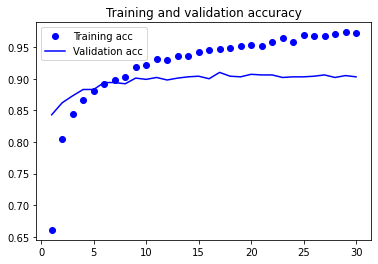

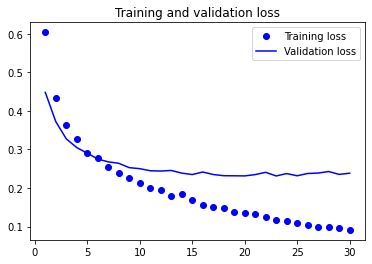

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# **Technique 2** - Combine two bases, freeze conv_base and train

In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [16]:
print('This is the number of trainable weights ' 
      'before freezing the conv base:', len(model.trainable_weights))

conv_base.trainable = False

print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [17]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, 
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), 
                                                    batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), 
                                                        batch_size=20, class_mode='binary')

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=50, 
                              validation_data=validation_generator, validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
100/100 [==============================] - 18s 177ms/step - loss: 0.6512 - acc: 0.6156 - val_loss: 0.4553 - val_acc: 0.8140
Epoch 2/50
100/100 [==============================] - 17s 172ms/step - loss: 0.4913 - acc: 0.7866 - val_loss: 0.3656 - val_acc: 0.8680
Epoch 3/50
100/100 [==============================] - 17s 171ms/step - loss: 0.4401 - acc: 0.8012 - val_loss: 0.3179 - val_acc: 0.8720
Epoch 4/50
100/100 [==============================] - 17s 171ms/step - loss: 0.3946 - acc: 0.8270 - val_loss: 0.3036 - val_acc: 0.8880
Epoch 5/50
100/100 [==============================] - 17s 172ms/step - loss: 0.3588 - acc: 0.8432 - val_loss: 0.2890 - val_acc: 0.8850
Epoch 6/50
100/100 [==============================] - 17s 171ms/step - loss: 0.3847 - acc: 0.8264 - val_loss: 0.2832 - val_acc: 0.8880
Epoch 7/50
100/100 [==============================] - 17s 172ms/step - loss: 0.3539 - acc: 0.8489 - val_loss: 0.2734 - val_acc: 0.8930
Epoch 8/50
100/100 [==============================] - 1

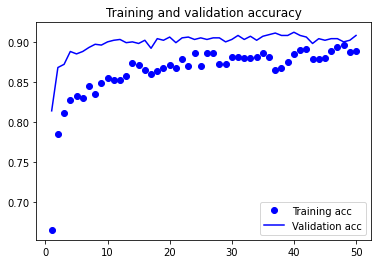

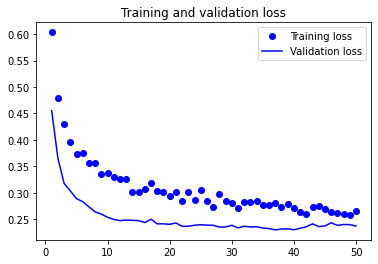

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# **Technique 3** - Fine-Tuning (Train the network added, unfreeze layers on base network, jointly retrain two networks)

In [19]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [23]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=20,
                              validation_data=validation_generator, validation_steps=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 19s 179ms/step - loss: 0.1574 - acc: 0.9360 - val_loss: 0.2430 - val_acc: 0.9220
Epoch 2/20
100/100 [==============================] - 17s 174ms/step - loss: 0.1414 - acc: 0.9484 - val_loss: 0.2111 - val_acc: 0.9250
Epoch 3/20
100/100 [==============================] - 17s 173ms/step - loss: 0.1496 - acc: 0.9457 - val_loss: 0.1922 - val_acc: 0.9280
Epoch 4/20
100/100 [==============================] - 17s 173ms/step - loss: 0.1150 - acc: 0.9586 - val_loss: 0.2180 - val_acc: 0.9320
Epoch 5/20
100/100 [==============================] - 17s 175ms/step - loss: 0.1165 - acc: 0.9514 - val_loss: 0.2035 - val_acc: 0.9280
Epoch 6/20
100/100 [==============================] - 17s 174ms/step - loss: 0.1001 - acc: 0.9632 - val_loss: 0.2065 - val_acc: 0.9330
Epoch 7/20
100/100 [==============================] - 17s 174ms/step - loss: 0.1019 - acc: 0.9601 - val_loss: 0.2641 - val_acc: 0.9150
Epoch 8/20
100/100 [==============================] - 1

KeyboardInterrupt: ignored

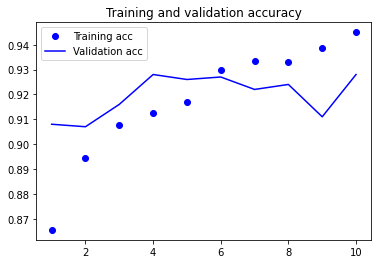

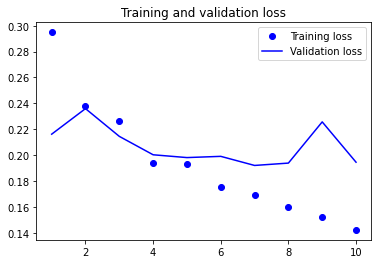

In [24]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150),
                                                  batch_size=20, class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test acc: 0.9169999957084656
